# Sistemas embebidos distribuidos - Trabajo práctico final
## Procesamiento de datos adquiridos

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

### Archivos en la memoria SD

In [104]:
!ls /Volumes/NO\ NAME/

A0003874.CSV A0005196.CSV A0017949.CSV A0034098.CSV LOG.TXT
A0004127.CSV A0010372.CSV A0022695.CSV A0115888.CSV


In [105]:
!mkdir -p data
!cp /Volumes/NO\ NAME/* data/

#### Peticiones recibidas por MQTT

In [106]:
!cat data/LOG.TXT

0033867 MQTT-IN: control/start 60
0115850 MQTT-IN: control/start 60
0017819 MQTT-IN: control/start 60
0010208 MQTT-IN: control/start 5
0022655 MQTT-IN: control/start 5
0003833 MQTT-IN: control/start 5
0009759 MQTT-IN: control/stop STOP
0004086 MQTT-IN: control/start 5
0005156 MQTT-IN: control/start 5


#### Primer archivo (en reposo)

In [107]:
df = pd.read_csv("data/A0034098.CSV")
df.head()

timestamp_ms  accel_x  accel_y  accel_z
0         34144        0        0        0
1         34148      632      140    17604
2         34155      680      176    17552
3         34163      652      116    17536
4         34194      584       48    17652

In [108]:
df["timestamp_ms"] = df["timestamp_ms"] - df["timestamp_ms"].min()

In [109]:
df["timestamp_ms"] = pd.to_datetime(df['timestamp_ms'], unit='ms')
df.tail(10)

timestamp_ms  accel_x  accel_y  accel_z
5990 1970-01-01 00:00:59.860      652      112    17564
5991 1970-01-01 00:00:59.870      720       16    17504
5992 1970-01-01 00:00:59.880      664      140    17616
5993 1970-01-01 00:00:59.890      636      120    17676
5994 1970-01-01 00:00:59.900      688       56    17740
5995 1970-01-01 00:00:59.910      732       92    17688
5996 1970-01-01 00:00:59.920      620      168    17672
5997 1970-01-01 00:00:59.930      616      112    17676
5998 1970-01-01 00:00:59.940      676      120    17656
5999 1970-01-01 00:00:59.950      560      184    17620

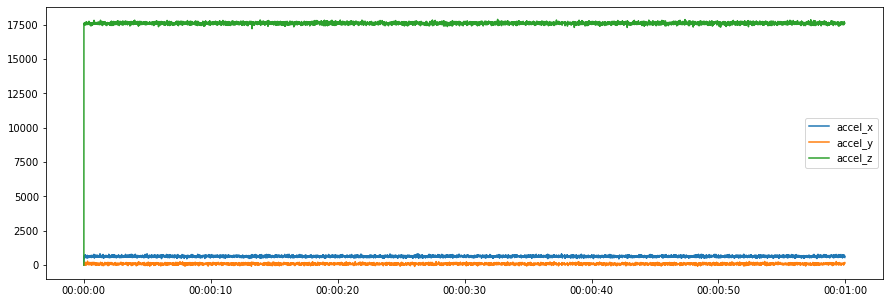

In [110]:
plt.figure(figsize=(15, 5))
plt.plot(df["timestamp_ms"], df["accel_x"])
plt.plot(df["timestamp_ms"], df["accel_y"])
plt.plot(df["timestamp_ms"], df["accel_z"])
plt.legend(['accel_x', 'accel_y', 'accel_z'])


In [111]:
x_min = df['accel_x'].min()
print(f'x mínimo: {x_min}')
x_max = df['accel_x'].max()
print(f'x máximo: {x_max}')
x_mean = df['accel_x'].mean()
print(f'x media: {x_mean}')
x_std = df['accel_x'].std()
print(f'desviación estándar de x: {x_std}')
y_min = df['accel_y'].min()
print(f'y mínimo: {y_min}')
y_max = df['accel_y'].max()
print(f'y máximo: {y_max}')
y_mean = df['accel_y'].mean()
print(f'y media: {y_mean}')
y_std = df['accel_y'].std()
print(f'desviación estándar de y: {y_std}')
z_min = df['accel_z'].min()
print(f'z mínimo: {z_min}')
z_max = df['accel_z'].max()
print(f'z máximo: {z_max}')
z_mean = df['accel_z'].mean()
print(f'z media: {z_mean}')
z_std = df['accel_z'].std()
print(f'desviación estándar de z: {z_std}')

x mínimo: 0
x máximo: 828
x media: 640.4186666666667
desviación estándar de x: 54.913574232558574
y mínimo: -96
y máximo: 292
y media: 89.13333333333334
desviación estándar de y: 50.8036651330792
z mínimo: 0
z máximo: 17900
z media: 17613.74133333333
desviación estándar de z: 240.13801060135847


In [112]:
df.describe()

accel_x      accel_y       accel_z
count  6000.000000  6000.000000   6000.000000
mean    640.418667    89.133333  17613.741333
std      54.913574    50.803665    240.138011
min       0.000000   -96.000000      0.000000
25%     604.000000    56.000000  17568.000000
50%     640.000000    88.000000  17616.000000
75%     676.000000   124.000000  17668.000000
max     828.000000   292.000000  17900.000000

In [113]:
# (modified from http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum
    
def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

In [114]:
df_wo_outliers = remove_outliers(df, "accel_x")
df_wo_outliers = remove_outliers(df_wo_outliers, "accel_y")
df_wo_outliers = remove_outliers(df_wo_outliers, "accel_z")

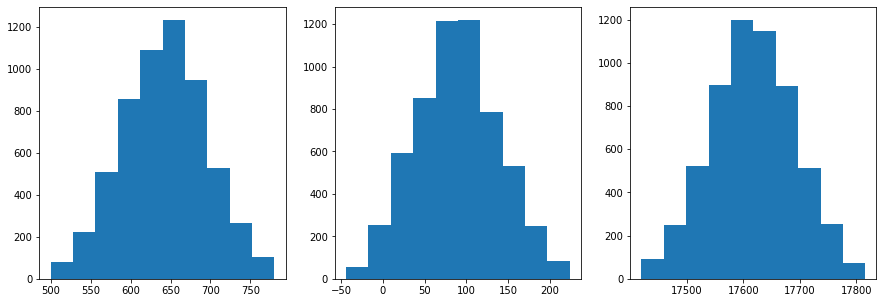

In [115]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax[0].hist(df_wo_outliers["accel_x"], bins=10)
ax[1].hist(df_wo_outliers["accel_y"], bins=10)
ax[2].hist(df_wo_outliers["accel_z"], bins=10)
plt.show()

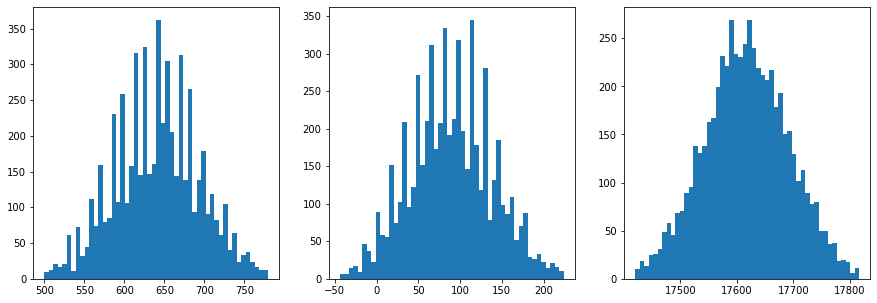

In [116]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax[0].hist(df_wo_outliers["accel_x"], bins=50)
ax[1].hist(df_wo_outliers["accel_y"], bins=50)
ax[2].hist(df_wo_outliers["accel_z"], bins=50)
plt.show()

#### Segundo archivo (movimiento sobre la mesa)

In [117]:
df_2 = pd.read_csv("data/A0115888.CSV")

In [118]:
df_2["timestamp_ms"] = df_2["timestamp_ms"] - df_2["timestamp_ms"].min()
df_2["timestamp_ms"] = pd.to_datetime(df_2['timestamp_ms'], unit='ms')
df_2.head()

timestamp_ms  accel_x  accel_y  accel_z
0 1970-01-01 00:00:00.000      612       80    17712
1 1970-01-01 00:00:00.004      612       28    17632
2 1970-01-01 00:00:00.012      572       96    17432
3 1970-01-01 00:00:00.020      572      200    17644
4 1970-01-01 00:00:00.051      712      120    17656

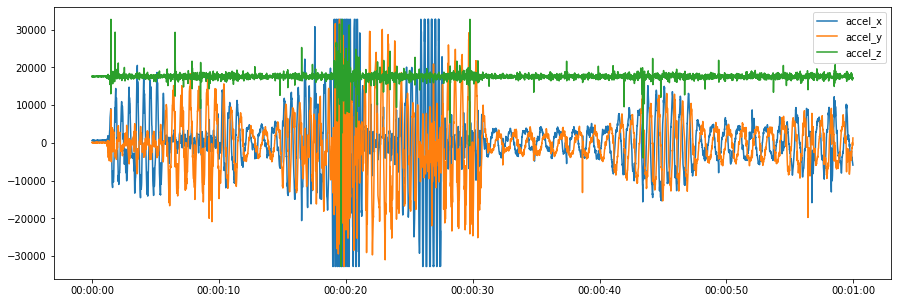

In [119]:
plt.figure(figsize=(15, 5))
plt.plot(df_2["timestamp_ms"], df_2["accel_x"])
plt.plot(df_2["timestamp_ms"], df_2["accel_y"])
plt.plot(df_2["timestamp_ms"], df_2["accel_z"])
plt.legend(['accel_x', 'accel_y', 'accel_z'])

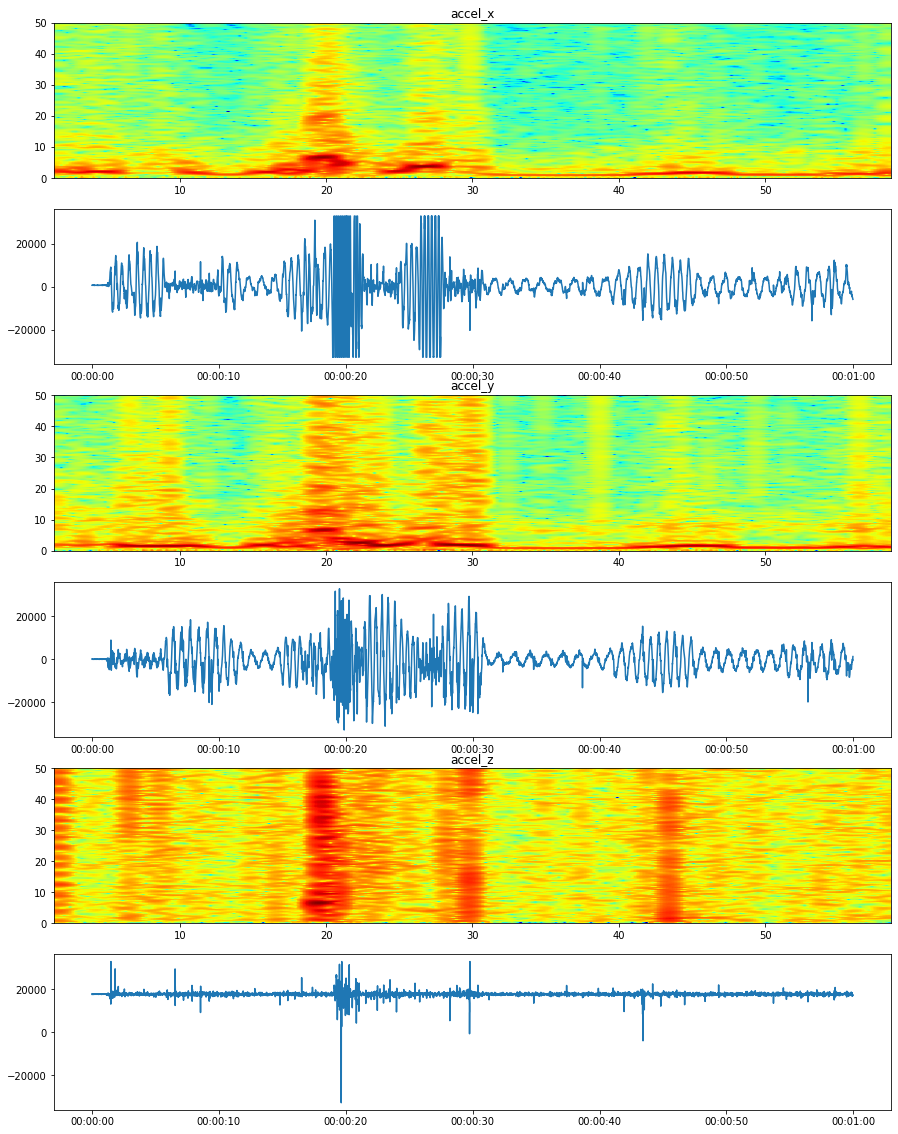

In [120]:
fig, ax = plt.subplots(6, 1)
fig.set_size_inches(15,20)
ax[0].specgram(df_2['accel_x'], Fs=100, noverlap=280, NFFT=300, detrend='mean', cmap='jet')
ax[1].plot(df_2["timestamp_ms"], df_2["accel_x"])
ax[0].set_title("accel_x")
ax[2].specgram(df_2['accel_y'], Fs=100, noverlap=280, NFFT=300, detrend='mean', cmap='jet')
ax[3].plot(df_2["timestamp_ms"], df_2["accel_y"])
ax[2].set_title("accel_y")
ax[4].specgram(df_2['accel_z'], Fs=100, noverlap=280, NFFT=300, detrend='mean', cmap='jet')
ax[5].plot(df_2["timestamp_ms"], df_2["accel_z"])
ax[4].set_title("accel_z")
plt.show()


In [121]:
df_wo_outliers = remove_outliers(df_2, "accel_x")
df_wo_outliers = remove_outliers(df_wo_outliers, "accel_y")
df_wo_outliers = remove_outliers(df_wo_outliers, "accel_z")

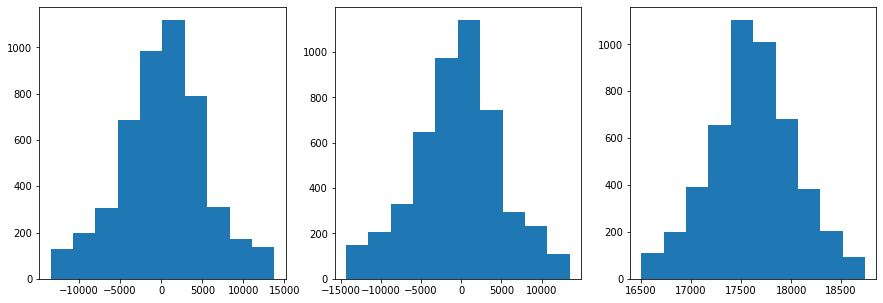

In [122]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax[0].hist(df_wo_outliers["accel_x"], bins=10)
ax[1].hist(df_wo_outliers["accel_y"], bins=10)
ax[2].hist(df_wo_outliers["accel_z"], bins=10)
plt.show()


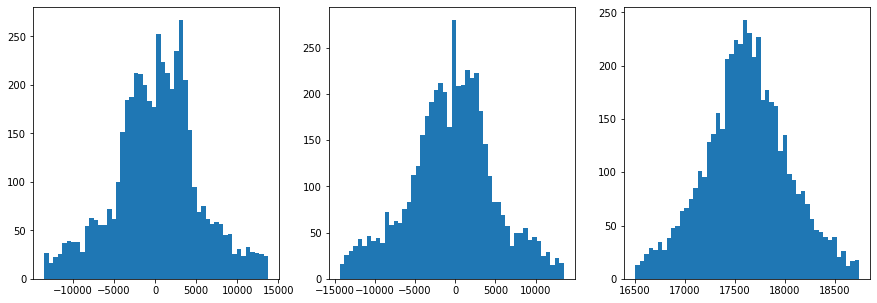

In [123]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax[0].hist(df_wo_outliers["accel_x"], bins=50)
ax[1].hist(df_wo_outliers["accel_y"], bins=50)
ax[2].hist(df_wo_outliers["accel_z"], bins=50)
plt.show()